## Timeseries IV Simulation

In [1]:
import os
import sys
sys.path.append('..')
IV_path = os.path.join('..', 'pvops', 'iv')
sys.path.append(IV_path)

from pvops.iv import timeseries_simulator

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

In [3]:
#example_prodpath = os.path.join('example_data', 'TMY_Seattle.csv')
example_prodpath = os.path.join('example_data', 'example_prod_with_covariates.csv')
env_df = pd.read_csv(example_prodpath)#, header=1)
# env_df['datetime'] = (pd.to_datetime(env_df['Date (MM/DD/YYYY)'], format='%m/%d/%Y') + 
#                   pd.to_timedelta(env_df['Time (HH:MM)'] + ':00'))
# env_df.index = pd.to_datetime(env_df['datetime'])
env_df.index = pd.to_datetime(env_df["date"])
env_df = env_df.sort_index()

# Only simulate where irradiance > 200
env_df = env_df[env_df['irrad_poa_Wm2'] > 200]
env_df.head()

,date,randid,generated_kW,expected_kW,irrad_poa_Wm2,temp_amb_C,wind_speed_ms,temp_mod_C
date,,,,,,,,
2018-04-01 08:00:00,2018-04-01 08:00:00,R10,5224.000,4695.636958,201.33150,-8.274167,14.9715,16.622917
2018-04-01 09:00:00,2018-04-01 09:00:00,R10,12156.000,13027.183091,532.41950,-7.278056,13.3265,23.690694
2018-04-01 09:00:00,2018-04-01 09:00:00,R15,6616.573,7343.981135,367.90350,20.168000,4.5095,24.574500
2018-04-01 10:00:00,2018-04-01 10:00:00,R10,13964.000,16900.283537,673.70075,-6.510556,12.6965,27.504583
2018-04-01 10:00:00,2018-04-01 10:00:00,R15,8847.800,10429.876422,508.28700,21.987000,4.9785,30.774000


In [4]:


failureA = timeseries_simulator.TimeseriesFailure()
longterm_fcn_dict = {
    'Rs_mult': "degrade"
}
annual_fcn_dict = {
    'Rs_mult': lambda x : ( 0.3 * np.sin(np.pi * x) )
}

failureA.trend(longterm_fcn_dict=longterm_fcn_dict,
               annual_fcn_dict=annual_fcn_dict,
               degradation_rate=1.005)

iv_col_dict = {'irradiance': 'irrad_poa_Wm2',
               'temperature': 'temp_amb_C'
               }

env_df['identifier'] = env_df.index.strftime("%Y-%m-%d %H:%M:%S")

time_simulator = timeseries_simulator.IVTimeseriesGenerator()
condition_dicts = time_simulator.generate(env_df, [failureA], iv_col_dict, 'identifier', plot_trends=False)

Text(0, 0.5, 'Rs_mult')

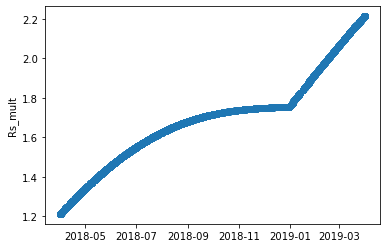

In [5]:
plt.scatter(time_simulator.specs_df.index, time_simulator.specs_df['Rs_mult'])
plt.ylabel('Rs_mult')

In [6]:
time_simulator.add_time_conditions('complete', nmods=12)
time_simulator.simulate()

Simulating cells:   0%|          | 0/3572 [00:00<?, ?it/s]C:\Users\mwhopwo\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\optimize\zeros.py:463: RuntimeWarning: some failed to converge after 100 iterations
  warnings.warn(msg, RuntimeWarning)
Simulating cells:  10%|▉         | 353/3572 [00:25<04:00, 13.38it/s]C:\Users\mwhopwo\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\optimize\zeros.py:406: RuntimeWarning: invalid value encountered in greater_equal
  failures[nz_der] = np.abs(dp) >= tol  # items not yet converged
Adding up other definitions: 100%|██████████| 3572/3572 [00:00<00:00, 11262.76it/s]


In [7]:
time_simulator.sims_to_df(focus=['string'], cutoff=True)

..\pvops\iv\physics_utils.py:121: RuntimeWarning: invalid value encountered in greater
  msk = Varr > val


,current,voltage,E,T,mode,level
0,"[1.7982625887726256, 1.797445157829115, 1.7966...","[3.834932371660216e-12, 12.948064445874971, 25...",201.33150,-8.274167,str_2018-04-01 08:00:00,string
1,"[4.756102620316704, 4.75387732998708, 4.751705...","[3.836930773104541e-12, 13.334700523771287, 26...",532.41950,-7.278056,str_2018-04-01 09:00:00,string
2,"[3.337371795870725, 3.3359901905267826, 3.3346...","[3.8370417954070035e-12, 11.97867132786855, 23...",367.90350,20.168000,str_2018-04-01 09:00:00,string
3,"[6.019644005000638, 6.0168135652504535, 6.0140...","[3.838707129943941e-12, 13.406530039113777, 26...",673.70075,-6.510556,str_2018-04-01 10:00:00,string
4,"[4.614598971431958, 4.61267786309795, 4.610802...","[3.836930773104541e-12, 12.058127583686554, 23...",508.28700,21.987000,str_2018-04-01 10:00:00,string
...,...,...,...,...,...,...
6802,"[7.6733580693548555, 7.670092094334731, 7.6669...","[3.838929174548866e-12, 12.325297752743763, 24...",846.50850,21.599000,str_2019-03-31 16:00:00,string
6803,"[9.039715965922197, 9.035448147239673, 9.03128...","[3.834932371660216e-12, 13.480454701964472, 26...",1011.77950,-3.943611,str_2019-03-31 16:00:00,string
6804,"[8.004586522884457, 8.000820223891912, 7.99714...","[3.836930773104541e-12, 13.433389582554687, 26...",895.76800,-4.124167,str_2019-03-31 17:00:00,string
6805,"[5.783334379061482, 5.78090078887974, 5.778525...","[3.835154416265141e-12, 12.185493551975885, 24...",637.68700,21.616000,str_2019-03-31 17:00:00,string
